In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper functions for Problem 1.
def f(x):
    return (5-x)*np.exp(x)-5

def df(x):
    return (4-x)*np.exp(x)

In [3]:
# Problem 1 (a).
a, b = 4, 5
tol = 1e-6
n = int(np.ceil(np.log((b-a) / tol) / np.log(2)))

print("Problem 1(a): Bisection Method")
for i in range(n):
    x = (a + b) / 2

    if f(x) > 0:
        a = x
    else:
        b = x

    # Print interval.
    print("Iteration " + str(i) + ":", (a, b))

Problem 1(a): Bisection Method
Iteration 0: (4.5, 5)
Iteration 1: (4.75, 5)
Iteration 2: (4.875, 5)
Iteration 3: (4.9375, 5)
Iteration 4: (4.9375, 4.96875)
Iteration 5: (4.953125, 4.96875)
Iteration 6: (4.9609375, 4.96875)
Iteration 7: (4.96484375, 4.96875)
Iteration 8: (4.96484375, 4.966796875)
Iteration 9: (4.96484375, 4.9658203125)
Iteration 10: (4.96484375, 4.96533203125)
Iteration 11: (4.965087890625, 4.96533203125)
Iteration 12: (4.965087890625, 4.9652099609375)
Iteration 13: (4.965087890625, 4.96514892578125)
Iteration 14: (4.965087890625, 4.965118408203125)
Iteration 15: (4.9651031494140625, 4.965118408203125)
Iteration 16: (4.965110778808594, 4.965118408203125)
Iteration 17: (4.965110778808594, 4.965114593505859)
Iteration 18: (4.965112686157227, 4.965114593505859)
Iteration 19: (4.965113639831543, 4.965114593505859)


In [17]:
# Problem 1 (b).
error = np.inf
tol = 1e-8
x = 5
k = 0

print("Problem 1(b): Newton's Method")
while error > tol:
    # Get function value.
    fofx = f(x)
    print("Iteration " + str(k) + ":" + " (x = " + str(x) + ", f(x) = " + str(fofx) + ")")

    # Update.
    x = x - (fofx / df(x))
    error = np.abs(fofx)
    k = k + 1

Problem 1(b): Newton's Method
Iteration 0: (x = 5, f(x) = -5.0)
Iteration 1: (x = 4.966310265004573, f(x) = -0.16564277761091706)
Iteration 2: (x = 4.965115686301458, f(x) = -0.0002012018060986165)
Iteration 3: (x = 4.96511423174643, f(x) = -2.978897128969038e-10)


In [5]:
# Problem 1 (c).
error = np.inf
tol = 1e-8
k = 0 
x_prev = 4
x_curr = 5

print("Problem 1(c): Secant Method")
while error > tol:
    # Print before.
    print("Iteration " + str(k) + ":" + " (x = " + str(x_prev) + ", f(x) = " + str(f(x_prev)) + ")")
    
    # Assign temp values.
    f_curr = f(x_curr)
    f_prev = f(x_prev)

    # Update.
    x = x_curr - f_curr * (x_curr - x_prev) / (f_curr - f_prev)
    error = np.abs(f(x))
    k = k + 1
    x_prev = x_curr
    x_curr = x

# Print after.
print("Iteration " + str(k) + ":" + " (x = " + str(x) + ", f(x) = " + str(f(x)) + ")")

Problem 1(c): Secant Method
Iteration 0: (x = 4, f(x) = 49.598150033144236)
Iteration 1: (x = 5, f(x) = -5.0)
Iteration 2: (x = 4.908421805556329, f(x) = 7.402024407938184)
Iteration 3: (x = 4.963079336311798, f(x) = 0.2808942198028612)
Iteration 4: (x = 4.965235312126352, f(x) = -0.016750499040933065)
Iteration 5: (x = 4.965114231713327, f(x) = 4.280998666672531e-09)


In [14]:
# Problem 3.
c = 0.5
x = c * np.pi
n = 100

for i in range(n):
    x = np.cos(x)

    if i == n-1:
        print(x)

0.7390851332151607


In [7]:
# Problem 4.
a0 = 1/4 + np.sqrt(6) / 36
a1 = 1/4 - np.sqrt(6) / 36
x0 = (6 + np.sqrt(6)) / 10
x1 = (6 - np.sqrt(6)) / 10

J = np.array([[1, 1, 0, 0], [x0, x1, a0, a1], [x0 ** 2, x1 ** 2, 2*a0*x0, 2*a1*x1], [x0 ** 3, x1 ** 3, 3 * a0 * (x0 ** 2), 3 * a1 * (x1 ** 2)]])
det_J = np.linalg.det(J)
print("Jacobian determinant:", det_J)

Jacobian determinant: -0.003333333333333319


In [8]:
# Problem 5.
def prob5(T, alpha, beta, n, h, t, x0):
    x = x0
    lower_diag = np.diag(np.ones(shape=n-2), k=-1)
    upper_diag = np.diag(np.ones(shape=n-2), k=1)
    steps = [x]
    tol = 1e-6
    
    for i in range(100):
        # Jacobian.
        main_diag = np.diag(-2 + (h **2) * np.cos(x))
        J = lower_diag + main_diag + upper_diag
    
        # Get f(x_i).
        f = np.zeros(shape=n-1)
        xp = np.concatenate([np.array([alpha]), x, np.array([beta])])
        for j in range(1, n):
            f[j-1] = xp[j-1] - 2 * xp[j] + xp[j+1] + (h ** 2) * np.sin(xp[j]) 
    
        # Solve J @ delta = -f 
        delta = np.linalg.solve(J, -f)
    
        # Update.
        x = x + delta
        steps.append(x.copy())

        # This is the stopping criterion I chose.
        if np.mean(np.abs(delta)) < tol:
            break
    
    fig, ax = plt.subplots()
    plt.xlabel("Time")
    plt.ylabel("Theta")
    for i in range(len(steps)):
        ax.plot(t, steps[i], label="Step " + str(i))
    plt.legend()
    plt.show()

    # Return results.
    return x

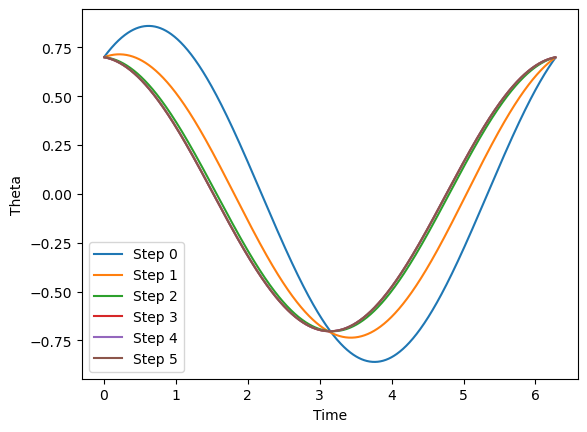

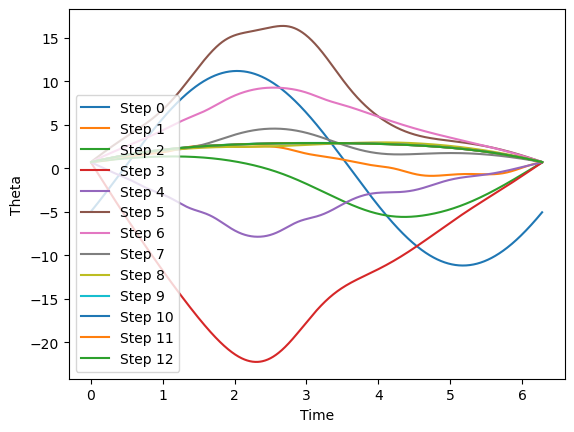

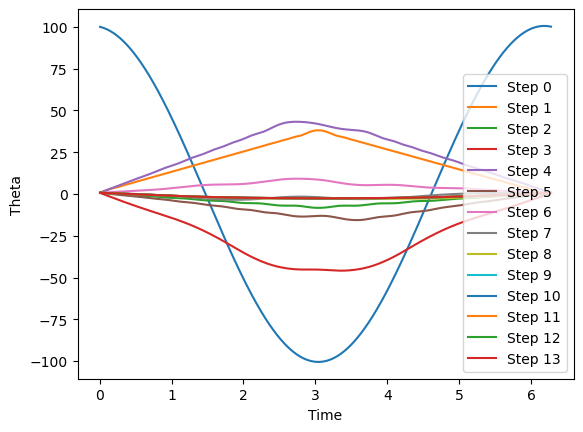

In [9]:
# Problem 5.
T = 2 * np.pi
alpha, beta = 0.7, 0.7
n = 1000
h = T / n
t = np.array([i * h for i in range(1, n)])

# Different initial conditions.
x0_1 = 0.7 * np.cos(t) + 0.5 * np.sin(t)  
x0_2 = -5 * np.cos(t) + 10 * np.sin(t)
x0_3 = 100 * np.cos(t) - 10 * np.sin(t)

r1 = prob5(T, alpha, beta, n, h, t, x0_1)
r2 = prob5(T, alpha, beta, n, h, t, x0_2)
r3 = prob5(T, alpha, beta, n, h, t, x0_3)

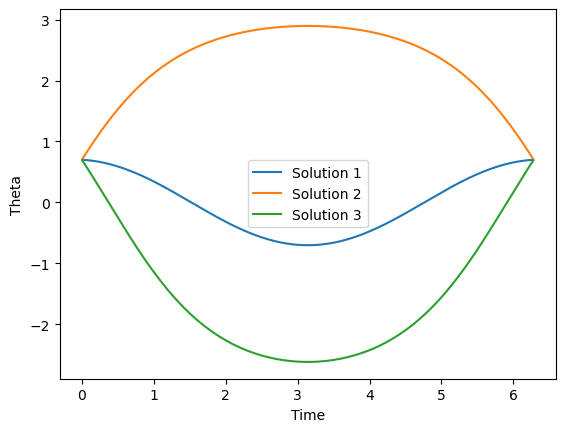

In [10]:
# I found other solutions. Plot them all.
fig, ax = plt.subplots()
plt.xlabel("Time")
plt.ylabel("Theta")
ax.plot(t, r1, label="Solution 1")
ax.plot(t, r2, label="Solution 2")
ax.plot(t, r3, label="Solution 3")
plt.legend()
plt.show()